# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Dimensionality Reduction`.


## Instructions

- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified. Libraries allowed (Numpy, matplotlib)

## Datasets 
- The IIIT-CFW is database for the cartoon faces in the wild. The dataset contains 8928 annotated cartoon faces of famous personalities of the world with varying profession. Additional 1000 real faces of the public figure to study cross modal retrieval tasks, such as, Photo2Cartoon retrieval. Ref - https://cvit.iiit.ac.in/research/projects/cvit-projects/cartoonfaces
- We have sub sampled the following data for this assignment - Cartoon faces of 8 subjects and approx. 100 images for each subject. 


## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q2.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: <br>
Roll Number:

In [2]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [3]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image


## Load Data

In [4]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}


In [5]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y]
            image_list.append(im)
            y_list.append(y)
        else:
            continue
        
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [6]:
dirpath = 'data/IIIT-CFW/'
X,y = load_data(dirpath)
type(X)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


numpy.ndarray

[333 626 172 450 277 449]


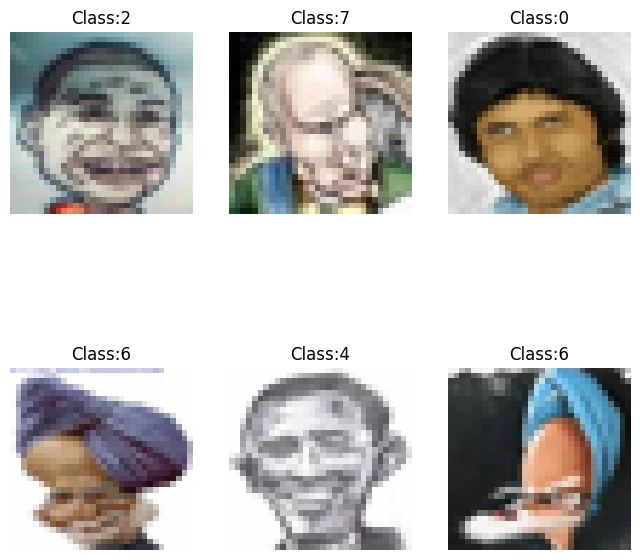

In [7]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
print(ind)
display_images(X[ind,...],y[ind], row=2,col=3)

## Dimensionality Reduction
- Plot eigen spectrum for the data.

Percentage of variance preserved is defined as the fraction of eigen values used. As we include more principal components to describe the data, the percentage of variances preserved under the dimensionality reduction increases. 

- Plot the percentage of variances vs the number of principal components to validate the above statement.
- Try visualizing these eigen vectors. Comment on what these ghost faces represent 
- Try reconstructing images with your choice of number of principal components and visualize the reconstructed image.

Let's define reconstruction error as the frobenius norm of the difference between original and reconstructed image. 

- Plot the number of principal components vs the corresponding reconstruction error for 5 selected number of principal components of your choice.
- Using the two dominant principal values, plot the data with colors showing the labels. What do you observe?


#### Write a function that gives eigen values and eigen vectors given data

In [8]:
#reshaping the data
X_reshape=np.reshape(X,(N, H * W * C))
print('Reshaped matrix: {}'.format(X_reshape.shape))

# write function
def normalization_vector(s,vector):
    for i in range (s):
            vector [:, i] = vector [:, i]/ np.linalg.norm(vector [:, i])
    return vector
def get_eigen(data, y):
    
    #subtracting from mean
    mean=np.mean(data,axis=0)
    data = data - mean
    
    #getting data size and dimension
    no_of_images=data.shape[0]
    dimen=data.shape[1]
    
    #calculating covaiance matrix and eigenvalues
    if no_of_images < dimen:   
        cov = np.dot (data, data.T)  
        eigval ,eigvec = np.linalg.eigh(cov)
        eigvec = np.dot(data.T, eigvec)
        eigvec=normalization_vector(no_of_images,eigvec)
        # for i in range (N):
        #     eigvec [:, i] = eigvec [:, i]/ np.linalg.norm(eigvec [:, i])
        # print('eigenvectors dim:{}'.format(eigenvectors.shape))     (3072, 672)
    #for images less than dimension
    else :   
        cov = np.dot(data.T, data) 
        eigval ,eigvec = np.linalg.eigh(cov)
            
    #sorting the eigen vectors
    index = np.argsort (- eigval )
    eigval = eigval [index]
    eigvec = eigvec [:, index]
    
    return  eigval , eigvec 


Reshaped matrix: (672, 3072)


#### Compute eigen values and plot eigen value spectrum

In [9]:
# eigen values and spectrum
#calculating eigen values and eigen vectors
eigval , eigvec = get_eigen(X_reshape, y)
eigvec = eigvec.T

print(eigvec[0])
print(eigval[0])

[0.02292623 0.02397955 0.02493145 ... 0.02018243 0.02059623 0.02169246]
54037.090920998475


#### Plot the percentage of variances vs the number of principal components

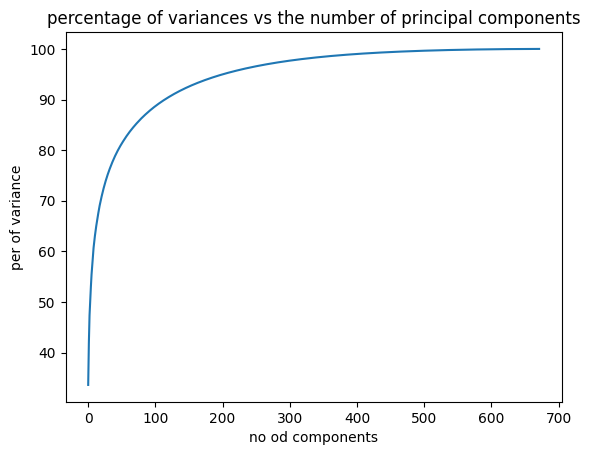

In [10]:
#Plot the percentage of variances vs the number of principal components

step_size=range(0, eigvec.shape[0])

plt.plot(step_size,(np.cumsum(eigval) / np.sum(eigval))*100.0)
plt.title("percentage of variances vs the number of principal components")
plt.xlabel('no od components')
plt.ylabel('per of variance')
plt.show()

#### Visualize eigen faces(eigen vectors)

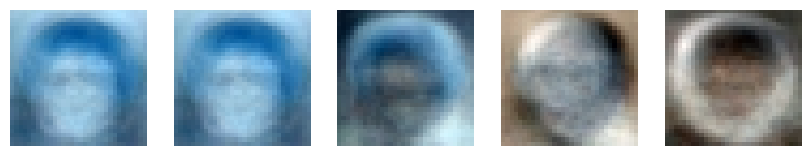

In [11]:


def plot(image,H,W,C,indices):
    #indices = [randrange(100)+1 for i in range(5)]
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for c,i in enumerate(indices):
        ele = pl[i]
        minim = np.min(ele)
        maxim = np.max(ele)
        ele = (ele - minim) / (maxim - minim)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,c+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()

indices = [randrange(12)+1 for i in range(5)]
plot(eigvec,H,W,C, indices)


#### Reconstruction 

In [12]:
# reconstruction

def get_eigvec(eigval, variance = .90):
    for ii, eigenvalue_cumulative_sum in enumerate(np.cumsum(eigval) / np.sum(eigval)):
        if eigenvalue_cumulative_sum > variance:
            return ii
        
def reconstruction (eigvec_proj , P , mu) :
    return (eigvec_proj.T @ P).reshape(-1) + mu

def projection (eigvec_proj , X , mu):
    return (eigvec_proj @ (X-mu).reshape(-1, 1))

def Image_plot(img_set, r, c, img_titles):
    fig = plt.figure(figsize = (10, 10))
    count = 0
    for i in range(r):
        for j in range(c):
            if count == len(img_set):
                break
            ax1 = fig.add_subplot(r, c, count + 1)
            ax1.imshow(img_set[count], cmap = 'gray')
            ax1.set_title(img_titles[count], fontsize = 15)
            count = count + 1
    plt.show() 


#### Plot data in 2D

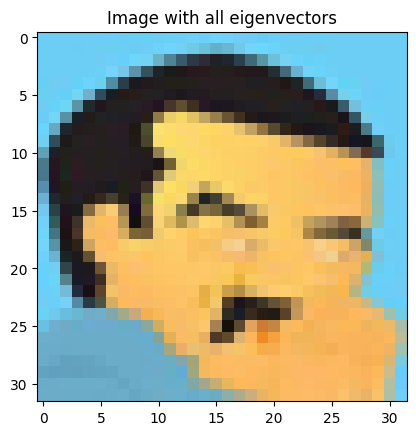

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


number of components required for 80.0 variance: 45
frobenius norm for 80.0 variance: 7.729250670162106
number of components required for 85.0 variance: 71
frobenius norm for 85.0 variance: 6.393704564867952
number of components required for 90.0 variance: 114
frobenius norm for 90.0 variance: 5.360971398160357
number of components required for 95.0 variance: 201
frobenius norm for 95.0 variance: 3.733789123394755
number of components required for 99.0 variance: 400
frobenius norm for 99.0 variance: 1.26969564751589


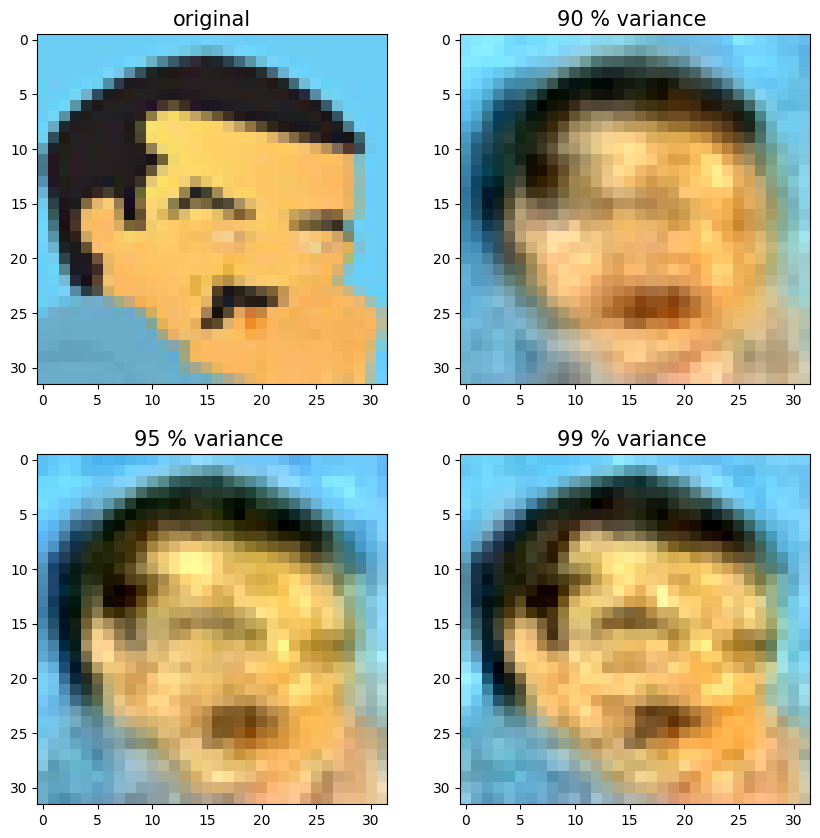

In [20]:
# plot data in 2D
def plot_reconst_var(var,val_eig,eig_vec,mean,H,W,C,image_reshape):
    
    n_comp = get_eigvec(val_eig, var)
    
    print('number of components required for {} variance: {}'.format(var*100.0, n_comp))
    
    Pro = projection(eig_vec[0: n_comp + 1, :], image_reshape.reshape (1 , -1) , mean) 
    Recon = reconstruction(eig_vec[0: n_comp + 1, :], Pro, mean)

    Recon = Recon.reshape(X_reshape[0].shape )
    # print("r "+str(image_reshape.shape))
    fnorm = np.linalg.norm(image_reshape - Recon, ord=None)
    image.append(Recon.reshape(H,W,C))
    return fnorm
    
variance=[0.80,0.85,0.90,0.95,0.99]

image = []
face = X_reshape[20]
image.append(face.reshape(H,W,C))
m_image = X_reshape.mean(axis = 0)

#all eigen vectors
Pro_all = projection(eigvec[0: 672, :], face.reshape (1 , -1) , m_image)  
Recon_all = reconstruction(eigvec[0: 672, :], Pro_all, m_image)

Recon_all = Recon_all.reshape(X_reshape[0].shape )
plt.imshow(Recon_all.reshape(H,W,C))
plt.title('Image with all eigenvectors')
plt.show() 


for i in variance:
    # print(face.reshape(H,W,C).shape)
    fnorm = plot_reconst_var(i,eigval,eigvec,m_image,H,W,C,face)
    print('frobenius norm for {} variance: {}'.format(i*100.0, fnorm)) 

Image_plot(image, 2, 2, ['original', '90 % variance ', '95 % variance ', '99 % variance '])

plt.show() 



## Lets analyze the principal components classwise
- Visualize dominant eigen faces of each of the classes.
- Print the number of principal components required to retain 90% variance for each of the classes and for the entire dataset
- Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

Example output:
```
Number of principal components required for 90% reconstruction of the:
Entire Dataset = 10 
Amitabhbachan = 10
AamirKhan = 10
...
```

In [15]:
# Load data again
X,y = load_data(dirpath)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


#### Visualize dominant eigen faces of each of the classes

class: Amitabhbachan


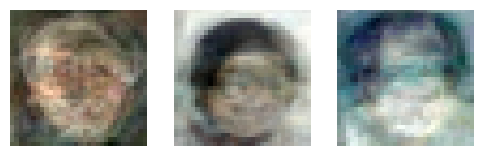

class: AamirKhan


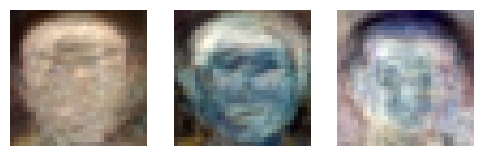

class: DwayneJohnson


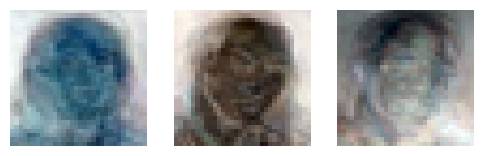

class: AishwaryaRai


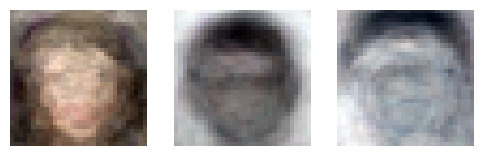

class: BarackObama


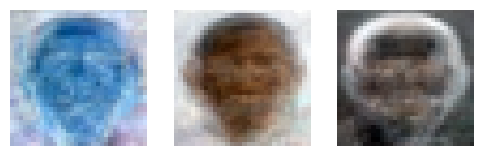

class: NarendraModi


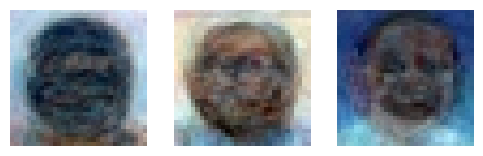

class: ManmohanSingh


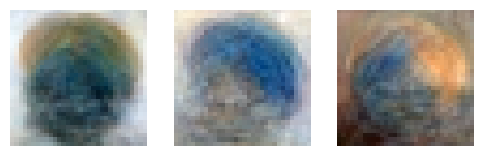

class: VladimirPutin


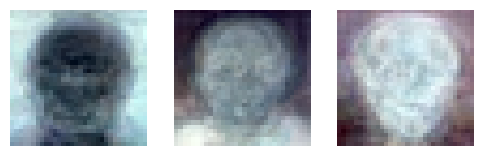

In [16]:
# visualize
def eigen_plot_class(image,H,W,C,indices):
    pl = np.reshape(image,(-1,H,W,C))
    plt.figure(figsize=(25,25))
    for a,b in enumerate(indices):
        ele = pl[b]
        minimum = np.min(ele)
        maximum = np.max(ele)
        ele = (ele - minimum) / (maximum - minimum)
        ele = np.clip(ele,0,254)
        plt.subplot(1,12,a+1)
        plt.axis('off')
        plt.imshow(ele,cmap=plt.cm.gray)
    plt.show()
    
def eigen_face(key,val,i):
    ind = np.where(y == i)[0]
    class_x = X[ind, :] 
    N,H,W = class_x.shape[0:3]
    
    C = 1 if opt['is_grayscale'] else class_x.shape[3]
    class_x = class_x.reshape((N, H * W * C)) 
    
    eigval, eigvec = get_eigen(class_x, y)
    eigvec = eigvec.T
    
    print('class: {}'.format(key))
    eigen_plot_class(eigvec,H,W,C, range(3))
    
    
i = 0
for keys, vals in cfw_dict.items():
    eigen_face(keys,vals,i)
    i = i + 1

In [22]:
#calculating eigen vectors for given variance
def eigvec_for_given_var(eigval, variance = .90):
    for ii, eigenvalue_cumulative_sum in enumerate(np.cumsum(eigval) / np.sum(eigval)):
        if eigenvalue_cumulative_sum > variance:
            return ii

#### Number of principal components required to retain 90% variance for each of the classes and for the entire dataset

In [33]:
X,y = load_data(dirpath)
print()
var = 0.90

def variability_for_each_class(keys,vals,i):
    print('class: {}'.format(keys))
    ind = np.where(y == i)[0]
    # print(ind)
    class_x = X[ind, :] 
    N,H,W = class_x.shape[0:3]
    
    C = 1 if opt['is_grayscale'] else class_x.shape[3]
    class_x = class_x.reshape((N, H * W * C)) 
    
    eigval, eigvec = get_eigen(class_x, y)
    eigvec = eigvec.T
    
    #step3: Number of principal components required to retain 90% variance
    no_of_components = eigvec_for_given_var(eigval, var)
    print('No of princinpal components required for {} variance is {}\n'.format(var*100,no_of_components))
    

#for each class
i = 0                               
for keys, vals in cfw_dict.items():
    variability_for_each_class(keys,vals,i)
    i = i + 1
    
#for entire dataset
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]
X = X.reshape((N, H * W * C)) 
eigval, eigvec = get_eigen(X, y)
eigvec = eigvec.T
    
no_of_components = eigvec_for_given_var(eigval, var)
print('For entire dataset')
print('No of princinpal components required {} variance is {}'.format(var*100,no_of_components))


Dataset shape: (672, 32, 32, 3)
Label shape: (672,)

class: Amitabhbachan
No of princinpal components required for 90.0 variance is 20

class: AamirKhan
No of princinpal components required for 90.0 variance is 23

class: DwayneJohnson
No of princinpal components required for 90.0 variance is 27

class: AishwaryaRai
No of princinpal components required for 90.0 variance is 35

class: BarackObama
No of princinpal components required for 90.0 variance is 42

class: NarendraModi
No of princinpal components required for 90.0 variance is 56

class: ManmohanSingh
No of princinpal components required for 90.0 variance is 49

class: VladimirPutin
No of princinpal components required for 90.0 variance is 43

For entire dataset
No of princinpal components required 90.0 variance is 114


#### Analysis : Are the number of components same for entire dataset and each of the classes. If yes why? If not why?

No of components are not same for entire dataset and each of the classes. Compared to entire dataset the no of components required for each class is very less to achieve the same percentage of variance. This is because the features representing the class is almost same (very less scattered), Where as for the entire it is more since it contains different classes. So, in order to retain the specific variance more no of principal components are required for entire dataset when compared with each class.

## Linear Regression (continued)
1. Perform linear regression on below datapoints
2. Use PCA for dimensionality reduction on this datapoints and then perform Linear regression.
3. Perform this experiment on different number of components and report the score for linear regression. Plot the graph of [1-200] principal components vs regression score. What do you observe?

Note :- Can use inbuilt functions for Linear Regression and PCA for this question

In [19]:
# datapoints
X,_ = load_data(dirpath)
X = X.reshape((X.shape[0],-1))
label = np.array([randrange((32*32*3)) for i in range(5)])
label = np.mean(X[:,label], axis = 1)
print(label.shape)

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)
(672,)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [28]:
#Perform linear regression on below datapoints
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print("Score without PCA {}".format(regr.score(X_test, y_test)))


Score without PCA 0.9790196780753291


In [29]:
#principal components vs regression score
def compute_pca(n_comp,data,label):
    scale = StandardScaler().fit_transform(data)
    pca = PCA(n_components=n_comp)
    principalComponents = pca.fit_transform(data)
    
    X_train, X_test, y_train, y_test = train_test_split(principalComponents, label, test_size = 0.25)

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    score=regr.score(X_test, y_test)
    
    return score

In [35]:
dict={}
n_comp=range(1,200,1)
for i in n_comp:
    Pca=compute_pca(i,X,label)
    dict[i]=Pca


Text(0.5, 1.0, 'principal components vs regression score')

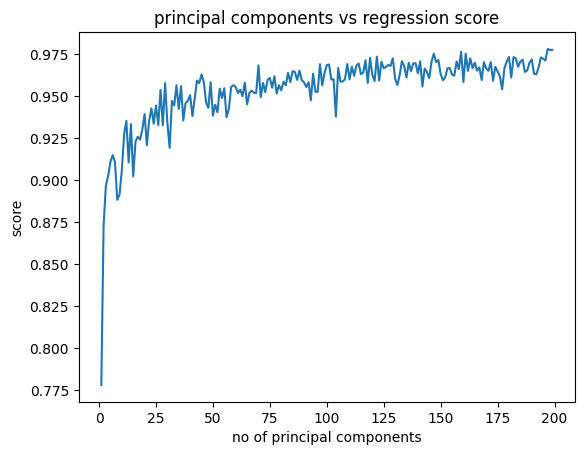

In [39]:
# analysis / plot (split the cells if required)plt.plot(dict.keys(),dict.values())
plt.plot(dict.keys(),dict.values())
plt.xlabel('no of principal components')
plt.ylabel('score')
plt.title('principal components vs regression score')